In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.dates as mdates  # Import date handling
import numpy as np

# Load data

In [2]:
#ground-truth
df_ode_results = pd.read_excel('../data/groundtruth_compartments.xlsx')
#data from 2012-2018
daily_data_compartments = df_ode_results
start_date = '2012-01-01 00:00:00'
#start_date = '2010-01-01 00:00:00'
end_date = '2018-12-31 00:00:00'
# Filter rows for a date range (e.g., from '2012-01-01' to '2018-12-31')
data = daily_data_compartments[(daily_data_compartments['Date'] >= start_date) & (daily_data_compartments['Date'] <= end_date)]
start_Day = 0
end_Day = 2531
data = data.loc[start_Day:end_Day]

In [3]:
sequence_length = 1
train_size = 2191

In [4]:
# Load Ih prediction data (for training part) from Excel files
df_flood_train = pd.read_excel("../results/predictions_plot_1stmodel_flood_seqlen1_oneinitcond_train.xlsx")
df_floodIh_train = pd.read_excel("../results/predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_train.xlsx")

df_rain_train = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_train.xlsx")
df_raincases_train = pd.read_excel("../results/predictions_plot_1stmodel_raincases_seqlen1_oneinitcond_train.xlsx")

df_floodTEMP_train = pd.read_excel("../results/predictions_plot_1stmodel_floodandTEMP_seqlen1_oneinitcond_train.xlsx")
df_floodTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_train.xlsx")

df_rainTEMP_train = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMP_seqlen1_oneinitcond_train.xlsx")
df_rainTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMPcases_seqlen1_oneinitcond_train.xlsx")

In [5]:
# Load Ih prediction data (for testing part) from Excel files
df_flood_test = pd.read_excel("../results/predictions_plot_1stmodel_flood_seqlen1_oneinitcond_test.xlsx")
df_floodIh_test = pd.read_excel("../results/predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_test.xlsx")
#df_floodIh_test = pd.read_excel("predictions_plot_1stmodel_floodIh_seqlen1_oneinitcond_test_useinitcond.xlsx")

df_rain_test = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_test.xlsx")
df_raincases_test = pd.read_excel("../results/predictions_plot_1stmodel_raincases_seqlen1_oneinitcond_test.xlsx")

df_floodTEMP_test = pd.read_excel("../results/predictions_plot_1stmodel_floodandTEMP_seqlen1_oneinitcond_test.xlsx")
#df_floodTEMPcases_train = pd.read_excel("predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_train.xlsx")
df_floodTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_test.xlsx")
#df_floodTEMPcases_test = pd.read_excel("predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_test_useinitcond.xlsx")

df_rainTEMP_test = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMP_seqlen1_oneinitcond_test.xlsx")
df_rainTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_rainTEMPcases_seqlen1_oneinitcond_test.xlsx")


In [6]:
#Aj Ih
df_ode_results_previous_work = pd.read_excel('../data/data.xlsx')
data_previous_work = df_ode_results_previous_work[(df_ode_results_previous_work['Date'] >= start_date) & (df_ode_results_previous_work['Date'] <= end_date)]

data_previous_work = data_previous_work.loc[start_Day:end_Day]
#data_previous_work.columns

# Plotting for training

In [7]:
df_flood_train

,Date,Sh_pred,Ih_pred,Rh_pred,Sa_pred,Ia_pred,Ra_pred,L_pred,Ch_pred
0,2012-01-02,2.419438e+06,19.887810,1007.364919,600.286342,297320.766346,531652.947313,543603.292027,1560.261684
1,2012-01-03,2.419438e+06,19.527624,1007.333934,600.330303,297304.252989,531669.416708,543589.419813,1561.309811
2,2012-01-04,2.419439e+06,19.185585,1007.278021,600.373925,297287.867582,531685.758493,543575.654694,1562.351080
3,2012-01-05,2.419439e+06,18.860600,1007.198308,600.417214,297271.609128,531701.973658,543561.995849,1563.385493
4,2012-01-06,2.419439e+06,18.557989,1007.096320,600.460171,297255.476645,531718.063184,543548.442460,1564.419864
...,...,...,...,...,...,...,...,...,...
2186,2017-12-27,2.419069e+06,17.048170,1378.956245,606.000410,295189.519701,533778.479890,541809.698222,5582.517411
2187,2017-12-28,2.419070e+06,16.865199,1378.198711,606.000410,295189.519700,533778.479890,541809.698221,5583.546218
2188,2017-12-29,2.419071e+06,16.694848,1377.429653,606.000410,295189.519699,533778.479891,541809.698221,5584.575025
2189,2017-12-30,2.419072e+06,16.529611,1376.649800,606.000410,295189.519699,533778.479892,541809.698220,5585.597036


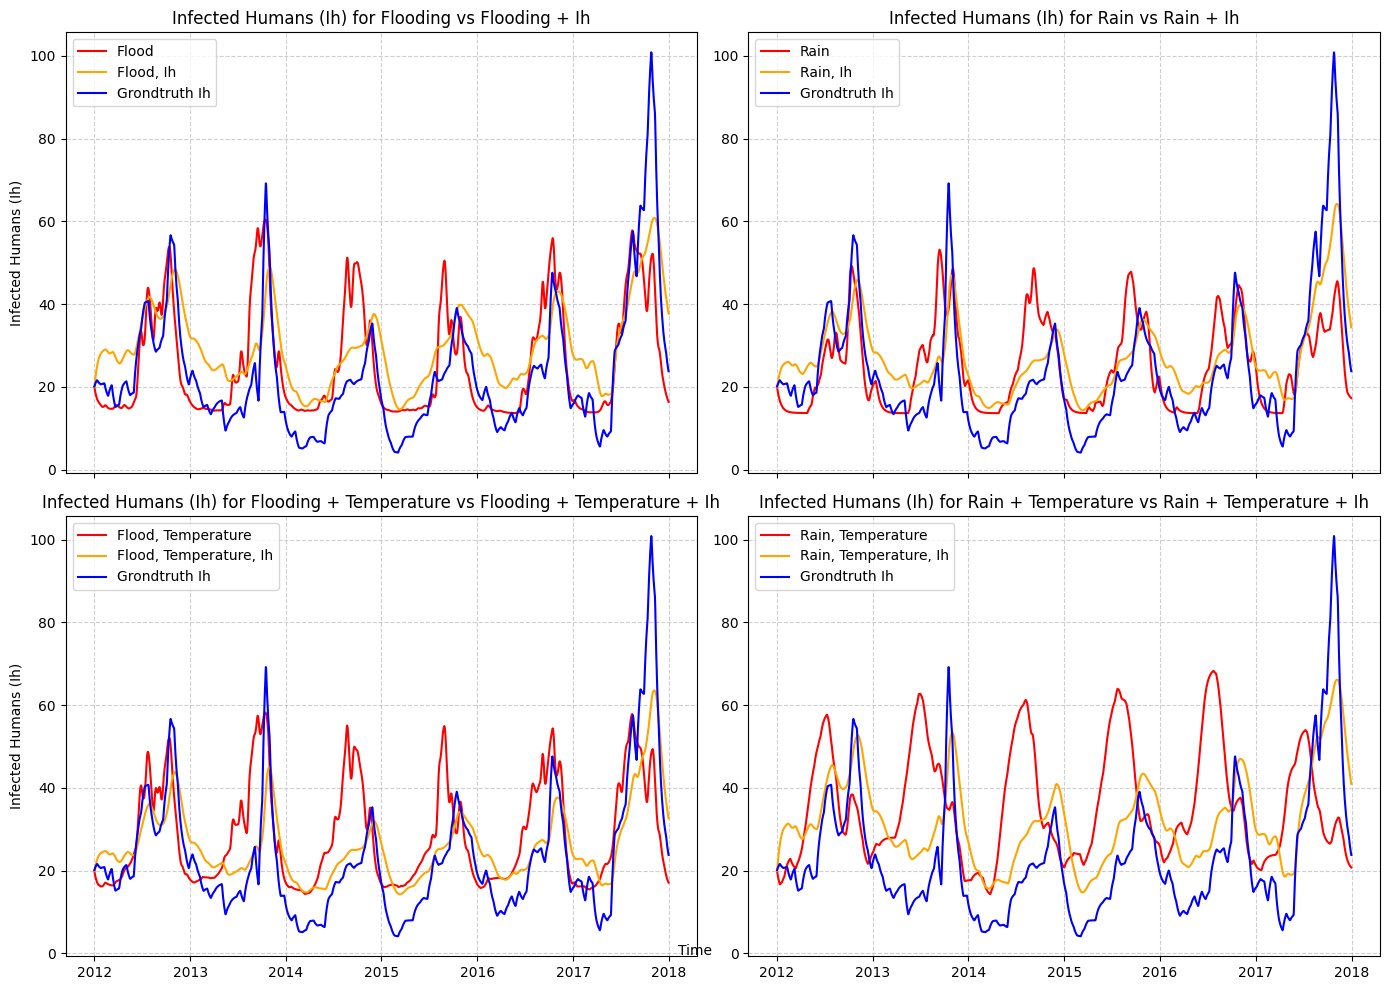

In [8]:
time_axis = df_flood_train["Date"]

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Subplot 1: Flood vs Flood + Ih
axes[0, 0].plot(time_axis, df_flood_train["Ih_pred"], label="Flood", color="red")
axes[0, 0].plot(time_axis, df_floodIh_train["Ih_pred"], label="Flood, Ih", color='orange')
axes[0, 0].plot(time_axis, data["Ih"][sequence_length:sequence_length+train_size], label="Grondtruth Ih", color='blue')
axes[0, 0].set_title("Infected Humans (Ih) for Flooding vs Flooding + Ih")
axes[0, 0].set_ylabel("Infected Humans (Ih)")
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Rain vs Rain + Ih
axes[0, 1].plot(time_axis, df_rain_train["Ih_pred"], label="Rain", color="red")
axes[0, 1].plot(time_axis, df_raincases_train["Ih_pred"], label="Rain, Ih", color='orange')
axes[0, 1].plot(time_axis, data["Ih"][sequence_length:sequence_length+train_size], label="Grondtruth Ih", color='blue')
axes[0, 1].set_title("Infected Humans (Ih) for Rain vs Rain + Ih")
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle="--", alpha=0.6)

# Subplot 3: Flood + Temperature vs Flood + Temperature + Ih
axes[1, 0].plot(time_axis, df_floodTEMP_train["Ih_pred"], label="Flood, Temperature", color="red")
axes[1, 0].plot(time_axis, df_floodTEMPcases_train["Ih_pred"], label="Flood, Temperature, Ih", color='orange')
axes[1, 0].plot(time_axis, data["Ih"][sequence_length:sequence_length+train_size], label="Grondtruth Ih", color='blue')
axes[1, 0].set_title("Infected Humans (Ih) for Flooding + Temperature vs Flooding + Temperature + Ih")
axes[1, 0].set_ylabel("Infected Humans (Ih)")
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 4: Rain + Temperature vs Rain + Temperature + Ih
axes[1, 1].plot(time_axis, df_rainTEMP_train["Ih_pred"], label="Rain, Temperature", color="red")
axes[1, 1].plot(time_axis, df_rainTEMPcases_train["Ih_pred"], label="Rain, Temperature, Ih", color='orange')
axes[1, 1].plot(time_axis, data["Ih"][sequence_length:sequence_length+train_size], label="Grondtruth Ih", color='blue')
axes[1, 1].set_title("Infected Humans (Ih) for Rain + Temperature vs Rain + Temperature + Ih")
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle="--", alpha=0.6)

# Set common x-axis label
fig.text(0.5, 0.04, "Time", ha="center")

# Adjust layout and show plot
plt.tight_layout()
#plt.savefig("../results/predicted_Ih_plot_1stmodel_factorsIh_train.png", dpi=300)
plt.show()


In [9]:
#error metrics
def compute_error_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100
    rmse = np.sqrt(mse)
    nrmse = rmse / (np.max(y_true) - np.min(y_true))
    rel = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        "MSE": mse,
        "MAE": mae,
        "MAPE (%)": mape,
        "SMAPE (%)": smape,
        "RMSE": rmse,
        "NRMSE": nrmse,
        "REL (%)": rel
    }


In [10]:
y_groundtruth = data["Ih"][sequence_length:sequence_length+train_size].values  # Groundtruth Ih (training period)


In [11]:
scenarios = {
    "Flood": df_flood_train["Ih_pred"].values,
    "Flood + Ih": df_floodIh_train["Ih_pred"].values,
    "Rain": df_rain_train["Ih_pred"].values,
    "Rain + Ih": df_raincases_train["Ih_pred"].values,
    "Flood + Temp": df_floodTEMP_train["Ih_pred"].values,
    "Flood + Temp + Ih": df_floodTEMPcases_train["Ih_pred"].values,
    "Rain + Temp": df_rainTEMP_train["Ih_pred"].values,
    "Rain + Temp + Ih": df_rainTEMPcases_train["Ih_pred"].values,
    "Previous work": data_previous_work["Ih"][sequence_length:sequence_length+train_size].values,
}


In [12]:
# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame()

for label, y_pred in scenarios.items():
    metrics = compute_error_metrics(y_groundtruth, y_pred)
    metrics_df[label] = pd.Series(metrics)

# Transpose for readability
metrics_df = metrics_df.T

# Save to Excel or CSV
#metrics_df.to_excel("../results/Ih_prediction_metrics_train.xlsx")

# Display metrics
print(metrics_df)


                          MSE        MAE    MAPE (%)  SMAPE (%)       RMSE  \
Flood              130.340704   7.881462   44.316193  33.736868  11.416685   
Flood + Ih         103.148771   8.959474   59.661453  41.437621  10.156218   
Rain               147.235843   8.605450   47.349854  36.638484  12.134078   
Rain + Ih           75.058878   7.267923   48.971932  35.212057   8.663653   
Flood + Temp       177.706875   9.963753   60.896023  41.532987  13.330674   
Flood + Temp + Ih   70.448886   6.732974   44.824863  32.827281   8.393383   
Rain + Temp        567.637335  18.755710  122.535439  63.228863  23.825141   
Rain + Temp + Ih   130.541304  10.522925   69.212807  46.615303  11.425467   
Previous work      131.836026   7.938962   44.658348  34.001678  11.481987   

                      NRMSE     REL (%)  
Flood              0.118039   44.316193  
Flood + Ih         0.105007   59.661453  
Rain               0.125457   47.349854  
Rain + Ih          0.089575   48.971932  
Flood + T

# Plotting for testing

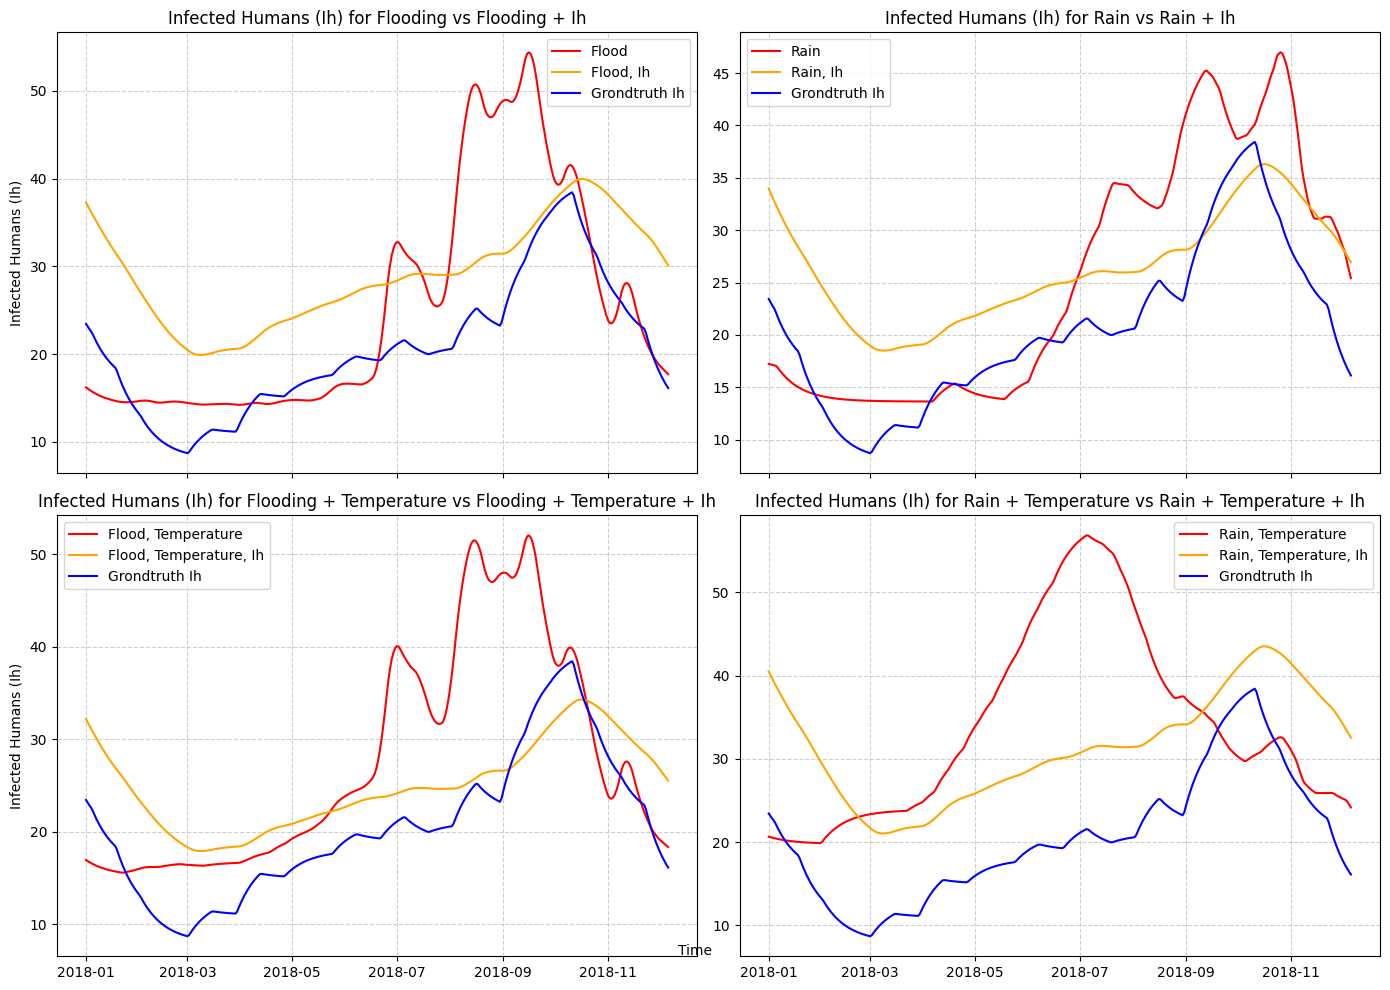

In [13]:
#use init cond
time_axis = df_flood_test["Date"]

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Subplot 1: Flood vs Flood + Ih
axes[0, 0].plot(time_axis, df_flood_test["Ih_pred"], label="Flood", color="red")
axes[0, 0].plot(time_axis, df_floodIh_test["Ih_pred"], label="Flood, Ih", color='orange')
axes[0, 0].plot(time_axis, data["Ih"][sequence_length+train_size:], label="Grondtruth Ih", color='blue')
axes[0, 0].set_title("Infected Humans (Ih) for Flooding vs Flooding + Ih")
axes[0, 0].set_ylabel("Infected Humans (Ih)")
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Rain vs Rain + Ih
axes[0, 1].plot(time_axis, df_rain_test["Ih_pred"], label="Rain", color="red")
axes[0, 1].plot(time_axis, df_raincases_test["Ih_pred"], label="Rain, Ih", color='orange')
axes[0, 1].plot(time_axis, data["Ih"][sequence_length+train_size:], label="Grondtruth Ih", color='blue')
axes[0, 1].set_title("Infected Humans (Ih) for Rain vs Rain + Ih")
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle="--", alpha=0.6)

# Subplot 3: Flood + Temperature vs Flood + Temperature + Ih
axes[1, 0].plot(time_axis, df_floodTEMP_test["Ih_pred"], label="Flood, Temperature", color="red")
axes[1, 0].plot(time_axis, df_floodTEMPcases_test["Ih_pred"], label="Flood, Temperature, Ih", color='orange')
axes[1, 0].plot(time_axis, data["Ih"][sequence_length+train_size:], label="Grondtruth Ih", color='blue')
axes[1, 0].set_title("Infected Humans (Ih) for Flooding + Temperature vs Flooding + Temperature + Ih")
axes[1, 0].set_ylabel("Infected Humans (Ih)")
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle="--", alpha=0.6)

# Subplot 4: Rain + Temperature vs Rain + Temperature + Ih
axes[1, 1].plot(time_axis, df_rainTEMP_test["Ih_pred"], label="Rain, Temperature", color="red")
axes[1, 1].plot(time_axis, df_rainTEMPcases_test["Ih_pred"], label="Rain, Temperature, Ih", color='orange')
axes[1, 1].plot(time_axis, data["Ih"][sequence_length+train_size:], label="Grondtruth Ih", color='blue')
axes[1, 1].set_title("Infected Humans (Ih) for Rain + Temperature vs Rain + Temperature + Ih")
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle="--", alpha=0.6)

# Set common x-axis label
fig.text(0.5, 0.04, "Time", ha="center")

# Adjust layout and show plot
plt.tight_layout()
#plt.savefig("../results/predicted_Ih_plot_1stmodel_factorsIh_test.png", dpi=300)
plt.show()


In [14]:
y_groundtruth = data["Ih"][sequence_length+train_size:].values  # Groundtruth Ih (testing period)

In [15]:
scenarios = {
    "Flood": df_flood_test["Ih_pred"].values,
    "Flood + Ih": df_floodIh_test["Ih_pred"].values,
    "Rain": df_rain_test["Ih_pred"].values,
    "Rain + Ih": df_raincases_test["Ih_pred"].values,
    "Flood + Temp": df_floodTEMP_test["Ih_pred"].values,
    "Flood + Temp + Ih": df_floodTEMPcases_test["Ih_pred"].values,
    "Rain + Temp": df_rainTEMP_test["Ih_pred"].values,
    "Rain + Temp + Ih": df_rainTEMPcases_test["Ih_pred"].values,
    "Previous work": data_previous_work["Ih"].values[sequence_length+train_size:],
}


# Table 4

In [16]:
#with init cond for testing period
# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame()

for label, y_pred in scenarios.items():
    metrics = compute_error_metrics(y_groundtruth, y_pred)
    metrics_df[label] = pd.Series(metrics)

# Transpose for readability
metrics_df = metrics_df.T

# Save to Excel or CSV
#metrics_df.to_excel("../results/Ih_prediction_metrics_test_useinitcond.xlsx")

# Display metrics
print(metrics_df)


                          MSE        MAE   MAPE (%)  SMAPE (%)       RMSE  \
Flood               92.081960   6.344180  30.362669  24.668992   9.595935   
Flood + Ih          85.855329   8.584267  52.334156  38.836711   9.265815   
Rain                61.063753   6.085517  29.130479  24.718549   7.814330   
Rain + Ih           47.160448   6.199332  39.132213  30.387059   6.867347   
Flood + Temp       116.357866   7.899420  40.542482  31.288369  10.786930   
Flood + Temp + Ih   35.411264   5.317658  33.837158  26.876433   5.950736   
Rain + Temp        325.045871  14.452991  83.341660  52.431796  18.029029   
Rain + Temp + Ih   130.721868  10.936036  64.203003  46.069058  11.433366   
Previous work       91.785423   6.318918  30.467564  24.688475   9.580471   

                      NRMSE    REL (%)  
Flood              0.322850  30.362669  
Flood + Ih         0.311743  52.334156  
Rain               0.262909  29.130479  
Rain + Ih          0.231048  39.132213  
Flood + Temp       0.362

In [17]:
#metrics_df.T.to_excel("../results/Ih_prediction_metrics_test_useinitcond_transposed.xlsx")

In [19]:

df_floodTEMPcases_train = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_train.xlsx")
df_floodTEMPcases_test = pd.read_excel("../results/predictions_plot_1stmodel_floodTEMPcases_seqlen1_oneinitcond_test.xlsx")

In [20]:
#Conformal intervals

def calculate_conformal_intervals(predictions, actuals, alpha=0.05, window_size=50):
    """
    Compute symmetric conformal prediction intervals using absolute residuals and a sliding window.

    Args:
        predictions (array-like): Predicted values.
        actuals (array-like): Ground truth values.
        alpha (float): Significance level (e.g., 0.05 for 95% confidence).
        window_size (int): Sliding window size for residual quantile estimation.

    Returns:
        lower_bounds (list): Lower bounds of the prediction interval.
        upper_bounds (list): Upper bounds of the prediction interval.
    """
    residuals = []
    lower_bounds = []
    upper_bounds = []

    for t in range(len(predictions)):
        # Use absolute residual from previous time step
        if t > 0:
            residual = abs(actuals[t - 1] - predictions[t - 1])
            residuals.append(residual)

        # Maintain residual sliding window
        if len(residuals) > window_size:
            residuals = residuals[-window_size:]

        # Compute the (1 - alpha) quantile of residuals
        if len(residuals) >= window_size:
            q = np.quantile(residuals, 1 - alpha)
        else:
            q = 1e6  # Wide interval until enough residuals

        # Symmetric interval around prediction
        lower_bounds.append(predictions[t] - q)
        upper_bounds.append(predictions[t] + q)

    return lower_bounds, upper_bounds


In [21]:
df_floodTEMPcases_train

,Date,Sh_pred,Ih_pred,Rh_pred,Sa_pred,Ia_pred,Ra_pred,L_pred,Ch_pred
0,2012-01-02,2.419438e+06,19.887810,1007.364919,600.286342,297320.766346,531652.947313,543603.292027,1560.261684
1,2012-01-03,2.419437e+06,20.206320,1007.358385,600.330303,297304.252989,531669.416708,543589.419813,1562.012983
2,2012-01-04,2.419437e+06,20.510694,1007.374117,600.373925,297287.867582,531685.758493,543575.654694,1563.772430
3,2012-01-05,2.419437e+06,20.801969,1007.411046,600.417214,297271.609128,531701.973658,543561.995848,1565.540025
4,2012-01-06,2.419436e+06,21.080987,1007.468303,600.460171,297255.476645,531718.063184,543548.442460,1567.315769
...,...,...,...,...,...,...,...,...,...
2186,2017-12-27,2.418994e+06,34.267626,1437.169588,606.000410,295189.519701,533778.479890,541809.698222,5663.537484
2187,2017-12-28,2.418994e+06,33.836880,1437.549213,606.000410,295189.519700,533778.479890,541809.698221,5665.540288
2188,2017-12-29,2.418994e+06,33.414720,1437.897920,606.000410,295189.519699,533778.479891,541809.698221,5667.521265
2189,2017-12-30,2.418994e+06,33.000680,1438.216229,606.000410,295189.519699,533778.479892,541809.698220,5669.480423


In [22]:
y_groundtruth_tr = data["Ih"][sequence_length:sequence_length+train_size].values  # Groundtruth Ih (training period)
y_groundtruth_te = data["Ih"][sequence_length+train_size:].values  # Groundtruth Ih (testing period)

In [23]:
# Convert predictions to NumPy arrays (update column name as needed)
y_pred_train = df_floodTEMPcases_train["Ih_pred"].values
y_pred_test = df_floodTEMPcases_test["Ih_pred"].values

In [24]:
# Choose significance level and window size
alpha = 0.05        # 95% confidence
window_size = 50    # adjust as needed

In [25]:
# Compute conformal intervals for training
lb_train, ub_train = calculate_conformal_intervals(
    predictions=y_pred_train,
    actuals=y_groundtruth_tr,
    alpha=alpha,
    window_size=window_size
)

# Compute conformal intervals for testing
lb_test, ub_test = calculate_conformal_intervals(
    predictions=y_pred_test,
    actuals=y_groundtruth_te,
    alpha=alpha,
    window_size=window_size
)

In [26]:
time_axis_all = pd.concat([df_flood_train["Date"], df_flood_test["Date"]]).reset_index(drop=True)


In [27]:
#all
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_true_all = np.concatenate([y_groundtruth_tr, y_groundtruth_te])

In [28]:
lb_all, ub_all = calculate_conformal_intervals(
    predictions=y_pred_all,
    actuals=y_true_all,
    alpha=alpha,
    window_size=window_size
)


In [29]:
# Define the time range
start_Day = 0
end_Day = 2531
df_ode_results = pd.read_excel('../data/data.xlsx')
Ih_previous_study = df_ode_results.loc[start_Day+sequence_length:end_Day, "Ih"]


In [30]:
df_betaHL_pred = pd.read_csv("../results/predicted_betaHL_1stmodel_floodTEMPcases_seqlen1_estimate.csv")
df_covariates = pd.read_excel("../data/covariates_date.xlsx")
# Extract β_hL data
time_axis = df_covariates["Date"][start_Day:end_Day]  # Common time axis
betaHL_pred = df_betaHL_pred.iloc[:, 1]  # Assuming second column has β_hL predictions
betaHL_existing = df_covariates["betaHL"][start_Day:end_Day].values  # Existing known β_hL

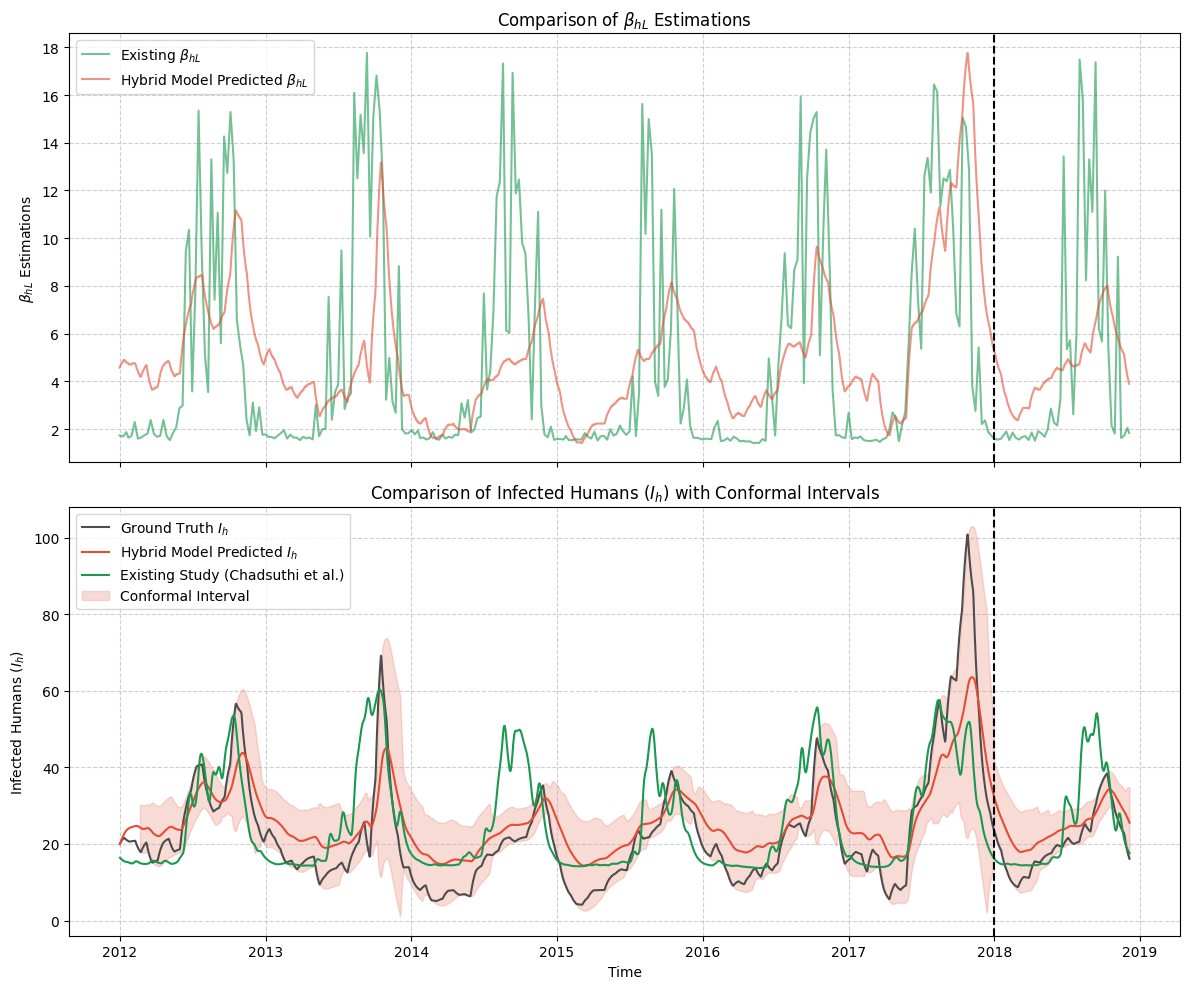

In [31]:
# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Subplot 1: β_hL Comparison
axes[0].plot(time_axis, betaHL_existing, label=r"Existing $\beta_{hL}$", color="#1A9850", alpha=0.6)
axes[0].plot(time_axis, betaHL_pred, label=r"Hybrid Model Predicted $\beta_{hL}$", color='#E44C34', alpha=0.6)
axes[0].axvline(x=time_axis_all.iloc[train_size], color="k", linestyle="--")
axes[0].set_ylabel(r"$\beta_{hL}$ Estimations")
axes[0].set_title(r"Comparison of $\beta_{hL}$ Estimations")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Infected Humans (Ih) with Conformal Intervals
future_axis = time_axis_all[window_size:]
axes[1].plot(time_axis_all, y_true_all, label='Ground Truth $I_h$', color="#4d4d4d")
axes[1].plot(time_axis_all, y_pred_all, label='Hybrid Model Predicted $I_h$', color='#E44C34')
axes[1].plot(time_axis_all, Ih_previous_study, label="Existing Study (Chadsuthi et al.)", color="#1A9850")
axes[1].fill_between(future_axis, lb_all[window_size:], ub_all[window_size:], color='#E44C34', alpha=0.2, label='Conformal Interval')
axes[1].axvline(x=time_axis_all.iloc[train_size], color="k", linestyle="--")
axes[1].set_ylabel("Infected Humans ($I_h$)")
axes[1].set_xlabel("Time")
axes[1].set_title("Comparison of Infected Humans ($I_h$) with Conformal Intervals")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout and show
plt.tight_layout()
#plt.savefig("../results/predicted_plot_PEmodel_hybridVSexisting_with_conformal_recom2.png", dpi=300)
plt.show()


In [32]:
# Load β_{hL} for rain-only model
df_rain_betaHL_train = pd.read_csv("../results/predicted_betaHL_1stmodel_rain_train.csv")
df_rain_betaHL_test = pd.read_csv("../results/predicted_betaHL_1stmodel_rain_test.csv")
df_betaHL_rain = pd.concat([df_rain_betaHL_train, df_rain_betaHL_test], ignore_index=True)
betaHL_rain = df_betaHL_rain.iloc[:, 1].values  # Assuming β_{hL} is in the second column

# Load predicted Ih for rain-only model
df_rain_pred_train = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_train.xlsx")
df_rain_pred_test = pd.read_excel("../results/predictions_plot_1stmodel_rain_seqlen1_oneinitcond_test.xlsx")
y_pred_rain_train = df_rain_pred_train["Ih_pred"].values
y_pred_rain_test = df_rain_pred_test["Ih_pred"].values
y_pred_rain_all = np.concatenate([y_pred_rain_train, y_pred_rain_test])

In [33]:
# Compute conformal intervals for rain-only predictions
lb_rain_all, ub_rain_all = calculate_conformal_intervals(
    predictions=y_pred_rain_all,
    actuals=y_true_all,
    alpha=alpha,
    window_size=window_size
)


# Figure 4

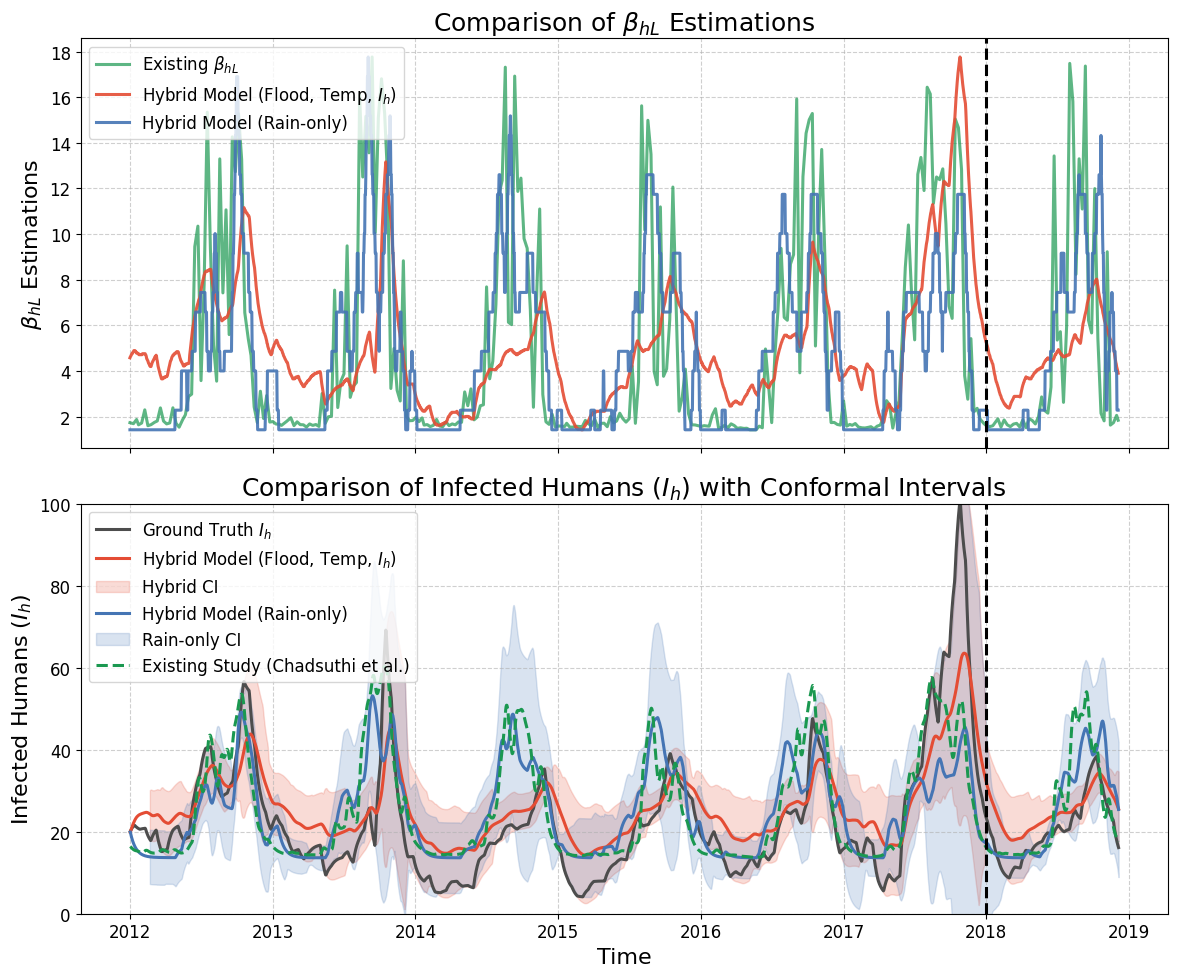

In [34]:

# Global font and line settings
plt.rcParams.update({
    "font.size": 14,          # increase font size
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2.2    # thicker lines globally
})

# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Subplot 1: β_hL Comparison
axes[0].plot(time_axis, betaHL_existing, label=r"Existing $\beta_{hL}$", color="#1A9850", alpha=0.7)
axes[0].plot(time_axis, betaHL_pred, label=r"Hybrid Model (Flood, Temp, $I_h$)", color='#E44C34', alpha=0.9)
axes[0].plot(time_axis, betaHL_rain, label=r"Hybrid Model (Rain-only)", color='#4575B4', alpha=0.9)
axes[0].axvline(x=time_axis_all.iloc[train_size], color="k", linestyle="--")
axes[0].set_ylabel(r"$\beta_{hL}$ Estimations")
axes[0].set_title(r"Comparison of $\beta_{hL}$ Estimations")
axes[0].legend(loc='upper left')
axes[0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Infected Humans (Ih) with two conformal intervals
future_axis = time_axis_all[window_size:]
axes[1].plot(time_axis_all, y_true_all, label='Ground Truth $I_h$', color="#4d4d4d")

# Hybrid model prediction and CI
axes[1].plot(time_axis_all, y_pred_all, label='Hybrid Model (Flood, Temp, $I_h$)', color='#E44C34')
axes[1].fill_between(future_axis, lb_all[window_size:], ub_all[window_size:], 
                     color='#E44C34', alpha=0.2, label='Hybrid CI')

# Rain-only model prediction and CI
axes[1].plot(time_axis_all, y_pred_rain_all, label='Hybrid Model (Rain-only)', color='#4575B4')
axes[1].fill_between(future_axis, lb_rain_all[window_size:], ub_rain_all[window_size:], 
                     color='#4575B4', alpha=0.2, label='Rain-only CI')

# Existing study
axes[1].plot(time_axis_all, Ih_previous_study, label="Existing Study (Chadsuthi et al.)", color="#1A9850", linestyle="--")

# Train-test split
axes[1].axvline(x=time_axis_all.iloc[train_size], color="k", linestyle="--")

# Formatting
axes[1].set_ylabel("Infected Humans ($I_h$)")
axes[1].set_xlabel("Time")
axes[1].set_title("Comparison of Infected Humans ($I_h$) with Conformal Intervals")
axes[1].set_ylim(0, 100)
axes[1].legend(loc='upper left')
axes[1].grid(True, linestyle="--", alpha=0.6)

# Finalize layout
plt.tight_layout()

# Save in multiple high-resolution formats
#for ext in ['png', 'svg', 'eps', 'tiff', 'pdf']:
#    plt.savefig(f"../figures/predicted_plot_PEmodel_hybrid_rain_compare_conformal_fixed.{ext}", dpi=300, bbox_inches='tight')

plt.show()
